In [ ]:
import pandas as pd
import numpy as np 
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
%matplotlib inline
from matplotlib.pylab import rcParams #Untuk visualisasi
from datetime import datetime #Untuk mengatasi tipe data tanggal


In [ ]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
# Kita ingin mengubah tipe data di kolom 'Month' dari object menjadi datetime
df['Month'] = pd.to_datetime(df['Month'], format="%Y-%m")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df[df['Month'].duplicated()]

,Month,#Passengers


In [ ]:
df=df.set_index(['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


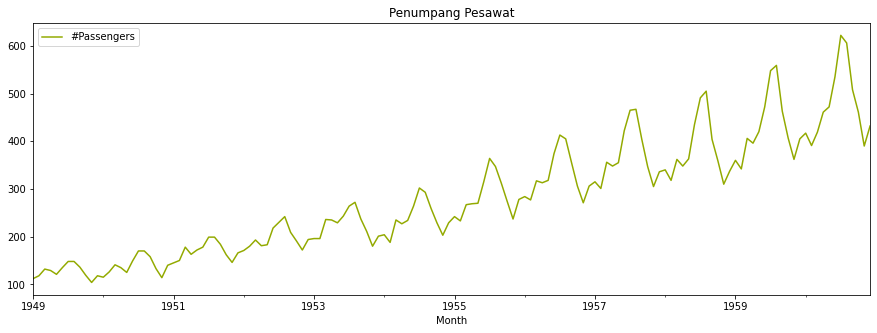

In [ ]:
# Kita akan visualisasi data time-seriesnya

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='-', figsize=(15,5), color=color_pal[2], title="Penumpang Pesawat")
plt.show()


In [ ]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.2

test_set_size = int(len(df) * test_ratio)
data_train = df[0:-test_set_size].copy()
data_test = df[-test_set_size:].copy()


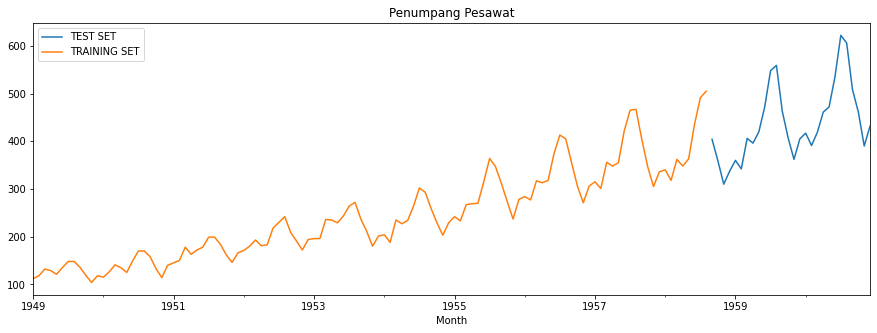

In [ ]:
# Melihat hasil pembagian data kita menggunakan visualisasi
data_test \
    .rename(columns={'#Passengers': 'TEST SET'}) \
    .join(data_train.rename(columns={'#Passengers': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Penumpang Pesawat", style='-')
plt.show()


In [ ]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)

from prophet import Prophet

In [ ]:
data_train.reset_index(inplace=True)

In [ ]:
# Mengembalikan kolom Month ke bentuk semula (sebelum jadi index)
data_train.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace=True)

In [ ]:
#Preprocessing untuk menggunakan Prophet model ini untuk df_test

data_test.reset_index(inplace = True)
data_test.rename(columns={'Month':'ds', '#Passengers':'y'}, inplace = True)
data_test


,ds,y
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


In [ ]:
#Panggil model FBProphet dan latih
model=Prophet()
model.fit(data_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
hasil_prediksi= model.predict(data_test)
hasil_prediksi

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-09-01,408.740719,401.059996,444.004962,408.740428,408.740719,13.802935,13.802935,13.802935,13.802935,13.802935,13.802935,0.0,0.0,0.0,422.543654
1,1958-10-01,411.914826,370.207120,413.379837,411.885103,411.936401,-19.882537,-19.882537,-19.882537,-19.882537,-19.882537,-19.882537,0.0,0.0,0.0,392.032289
2,1958-11-01,415.194736,342.852370,388.724556,415.120855,415.253207,-49.234756,-49.234756,-49.234756,-49.234756,-49.234756,-49.234756,0.0,0.0,0.0,365.959980
3,1958-12-01,418.368843,372.549432,415.131990,418.243312,418.481150,-25.287974,-25.287974,-25.287974,-25.287974,-25.287974,-25.287974,0.0,0.0,0.0,393.080869
4,1959-01-01,421.648753,378.704930,421.550299,421.460500,421.817169,-21.690880,-21.690880,-21.690880,-21.690880,-21.690880,-21.690880,0.0,0.0,0.0,399.957873
5,1959-02-01,424.928664,377.860284,421.444620,424.665120,425.172940,-26.516013,-26.516013,-26.516013,-26.516013,-26.516013,-26.516013,0.0,0.0,0.0,398.412650
6,1959-03-01,427.891164,406.672784,450.602328,427.553291,428.194516,1.382529,1.382529,1.382529,1.382529,1.382529,1.382529,0.0,0.0,0.0,429.273692
7,1959-04-01,431.171074,400.288845,446.561975,430.744672,431.552952,-6.939215,-6.939215,-6.939215,-6.939215,-6.939215,-6.939215,0.0,0.0,0.0,424.231858
8,1959-05-01,434.345181,408.195684,452.543784,433.832368,434.813003,-4.334321,-4.334321,-4.334321,-4.334321,-4.334321,-4.334321,0.0,0.0,0.0,430.010859
9,1959-06-01,437.625091,440.525685,485.824251,437.001865,438.180308,25.274845,25.274845,25.274845,25.274845,25.274845,25.274845,0.0,0.0,0.0,462.899937


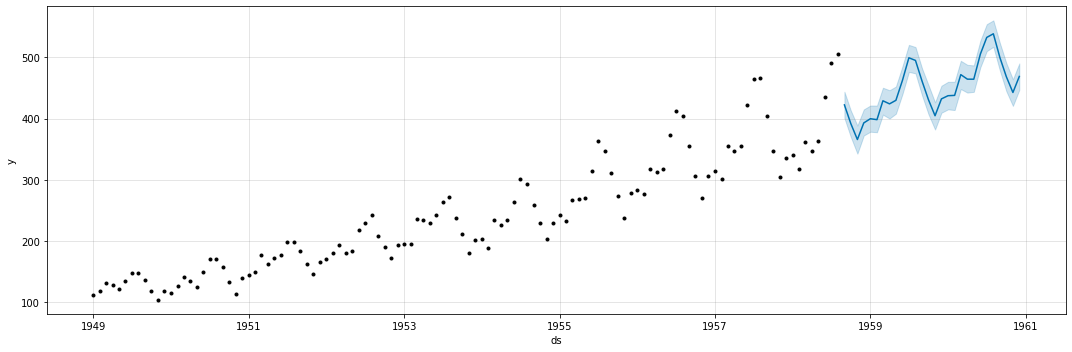

In [ ]:
# Visualisai hasil prediksi machine learning
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(hasil_prediksi,
                 ax=ax)
plt.show()


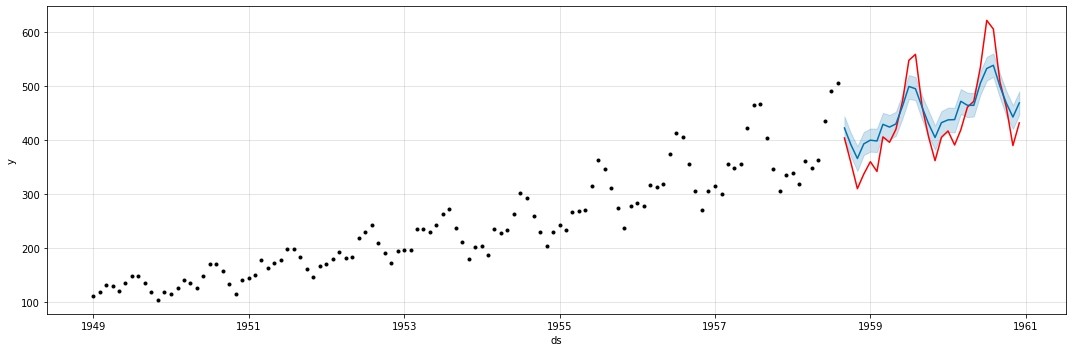

In [ ]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(data_test['ds'], data_test['y'], color='r')
fig = model.plot(hasil_prediksi, ax=ax)


In [ ]:
# Kita perlu ngebuat dataframe baru
prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])


In [ ]:
# Masukan tanggal yang kita inginkan untuk diprediksi

prediksi_tahun_berikutnya['ds'] = pd.date_range(start='1961-01-01', periods=12, freq='MS')
prediksi_tahun_berikutnya

,ds,y
0,1961-01-01,NaN
1,1961-02-01,NaN
2,1961-03-01,NaN
3,1961-04-01,NaN
4,1961-05-01,NaN
5,1961-06-01,NaN
6,1961-07-01,NaN
7,1961-08-01,NaN
8,1961-09-01,NaN
9,1961-10-01,NaN


In [ ]:
hasil_prediksi_satu_tahun_kedepan = model.predict(prediksi_tahun_berikutnya)
hasil_prediksi_satu_tahun_kedepan

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,498.991156,456.816359,502.094806,495.548411,502.366842,-19.664532,-19.664532,-19.664532,-19.664532,-19.664532,-19.664532,0.0,0.0,0.0,479.326624
1,1961-02-01,502.271067,452.161081,496.981126,498.653908,505.804253,-28.652147,-28.652147,-28.652147,-28.652147,-28.652147,-28.652147,0.0,0.0,0.0,473.618919
2,1961-03-01,505.233566,485.454902,530.902165,501.425360,508.901446,4.060384,4.060384,4.060384,4.060384,4.060384,4.060384,0.0,0.0,0.0,509.293951
3,1961-04-01,508.513477,481.385717,525.278685,504.507769,512.402613,-5.877035,-5.877035,-5.877035,-5.877035,-5.877035,-5.877035,0.0,0.0,0.0,502.636441
4,1961-05-01,511.687584,482.378501,525.214795,507.522557,515.796061,-7.152061,-7.152061,-7.152061,-7.152061,-7.152061,-7.152061,0.0,0.0,0.0,504.535523
5,1961-06-01,514.967494,518.945140,566.078155,510.621249,519.281391,27.893696,27.893696,27.893696,27.893696,27.893696,27.893696,0.0,0.0,0.0,542.861190
6,1961-07-01,518.141601,550.535151,594.876966,513.585033,522.590969,55.118133,55.118133,55.118133,55.118133,55.118133,55.118133,0.0,0.0,0.0,573.259734
7,1961-08-01,521.421511,552.271568,598.744299,516.599372,526.121099,54.374498,54.374498,54.374498,54.374498,54.374498,54.374498,0.0,0.0,0.0,575.796009
8,1961-09-01,524.701422,515.300673,561.854265,519.726649,529.586767,13.693843,13.693843,13.693843,13.693843,13.693843,13.693843,0.0,0.0,0.0,538.395265
9,1961-10-01,527.875528,483.863476,529.580392,522.684152,532.967564,-20.237589,-20.237589,-20.237589,-20.237589,-20.237589,-20.237589,0.0,0.0,0.0,507.637940


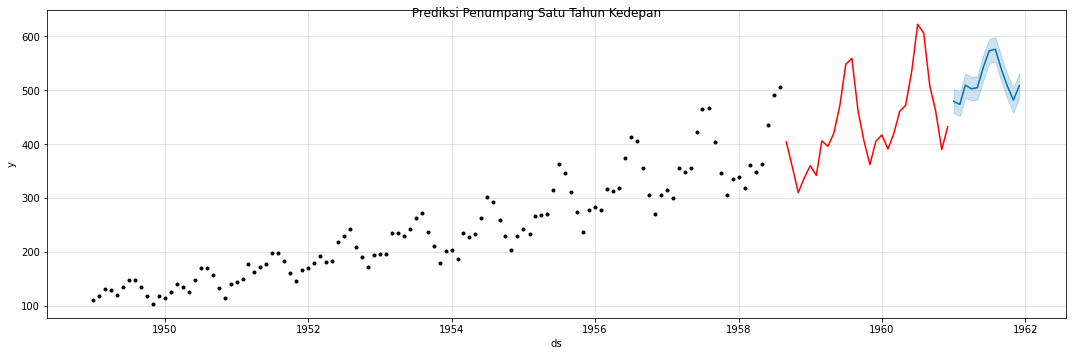

In [ ]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(data_test['ds'], data_test['y'], color='r')
fig = model.plot(hasil_prediksi_satu_tahun_kedepan,
                 ax=ax)
fig = plt.suptitle("Prediksi Penumpang Satu Tahun Kedepan")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
hasil_prediksi['yhat'] = hasil_prediksi['yhat'].astype(int)
data_test['y']
hasil_prediksi['yhat']
#mean_squared_error(data_test['y'], hasil_prediksi['yhat'])
mean_absolute_error(data_test['y'], hasil_prediksi['yhat'])


34.25